In [2]:
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension
# !pip install gmaps
# !jupyter nbextension enable --py --sys-prefix gmaps

In [3]:
# Displays figures in line
%matplotlib inline

# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import requests 
import json
import datetime
plt.style.use('ggplot')

from pprint import pprint
from config import api_key

# Configure gmaps with API key
gmaps.configure(api_key=api_key)

In [4]:
#url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json"
url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&returnIdsOnly=true"

In [5]:
response = requests.get(url)
resp_dict = json.loads(response.text)
objectIds = resp_dict["objectIds"]
objectId_count = len(objectIds)
# print(objectId_count)
  
crash_data = []  
count = 0
start = 0
end = 0
batch = 125

In [6]:
while count < objectId_count:

    end = end + batch
    url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= "+ str(objectIds[start:end]).replace('[','').replace(']','')
# url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= ' + str(objectIds[0:125]).replace('[','').replace(']','')
# url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds=47221836,47221838,47221481'
    
    response_new = requests.get(url).json()
    start = end   
    count = count + batch 
    data = response_new['features']
    
    #pprint(start)
    #pprint(end)
    #pprint(data)

# print(len(data))
    i = 0
    for x in data:
        crash_data.append(data[i]['attributes'])
        i = i + 1
#print(crash_data)
#response_new = requests.get(url)
#print(response_new.text)

# for x in response_new['features']:
#         crash_data.append(x)

In [9]:
master = pd.DataFrame(crash_data)
master_df = master.dropna(subset=["LATITUDE"])
master_df = master.dropna(subset=["LONGITUDE"])

master_df["FROMDATE"]=pd.to_datetime(master_df['FROMDATE'],unit='ms')
master_df["YEAR"]=pd.DatetimeIndex(master_df["FROMDATE"]).year
master_df["MONTH"]=pd.DatetimeIndex(master_df["FROMDATE"]).month

master_df = master_df.dropna(subset = ['FROMDATE'])
master_df["YEAR"] = master_df["YEAR"].astype(int)
master_df["MONTH"] = master_df["MONTH"].astype(int)

master_df = master_df.loc[master_df["YEAR"] >= 2008]
master_df = master_df.loc[master_df["YEAR"] < 2018]
print(master_df.head())

# Create csv file containing DC Crash Data
master_df.to_csv("DC Crash Data.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

                                  ADDRESS  BICYCLISTSIMPAIRED       CCN  \
61                           1500 U ST NW                   0  16092445   
76                       1700 U STREET NW                   0  16218973   
140                 700 KENILWORTH AVE NE                   0  16207613   
163  HAWAII AVENUE NE & ALLISON STREET NE                   0  17161068   
209          2940 NORTH CAPITOL STREET NW                   0  17137710   

      CRIMEID  DRIVERSIMPAIRED                                 EVENTID  \
61   26966014                0  {52C362B0-D1A0-44BB-9DF0-0731CC968A18}   
76   27170483                0  {9FB3E66C-B0F4-4337-BD5C-B9A42713093A}   
140  27149613                0  {619B430B-DE08-4696-88CA-4CBC3A8F8134}   
163  27433921                1  {8266D97F-095F-49FB-BD67-BF02F0968644}   
209  27396941                0  {54F37900-1563-49B8-AEC4-309C20F47E8B}   

     FATAL_BICYCLIST  FATAL_DRIVER  FATAL_PEDESTRIAN   FROMDATE  ...   \
61                 0           

In [10]:
master_df.count()

ADDRESS                       170080
BICYCLISTSIMPAIRED            170117
CCN                           170117
CRIMEID                       170117
DRIVERSIMPAIRED               170117
EVENTID                       170117
FATAL_BICYCLIST               170117
FATAL_DRIVER                  170117
FATAL_PEDESTRIAN              170117
FROMDATE                      170117
INTAPPROACHDIRECTION          160961
LASTUPDATEDATE                  1159
LATITUDE                      170117
LOCATIONERROR                   1603
LONGITUDE                     170117
MAJORINJURIES_BICYCLIST       170117
MAJORINJURIES_DRIVER          170117
MAJORINJURIES_PEDESTRIAN      170117
MARID                         170117
MAR_ADDRESS                   163888
MAR_SCORE                     170117
MEASURE                       168515
MINORINJURIES_BICYCLIST       170117
MINORINJURIES_DRIVER          170117
MINORINJURIES_PEDESTRIAN      170117
MPDGEOX                        55751
MPDGEOY                        55751
M

In [11]:
# Create dataframes for each ward containing all DC crash data
ward1DF = master_df.loc[master_df["WARD"]== "Ward 1"]
ward2DF = master_df.loc[master_df["WARD"]== "Ward 2"]
ward3DF = master_df.loc[master_df["WARD"]== "Ward 3"]
ward4DF = master_df.loc[master_df["WARD"]== "Ward 4"]
ward5DF = master_df.loc[master_df["WARD"]== "Ward 5"]
ward6DF = master_df.loc[master_df["WARD"]== "Ward 6"]
ward7DF = master_df.loc[master_df["WARD"]== "Ward 7"]
ward8DF = master_df.loc[master_df["WARD"]== "Ward 8"]

# Count total number of unique accidents for each ward
ward1_totalCount = master_df.loc[master_df["WARD"]== "Ward 1"].count()["CRIMEID"]
ward2_totalCount = master_df.loc[master_df["WARD"]== "Ward 2"].count()["CRIMEID"]
ward3_totalCount = master_df.loc[master_df["WARD"]== "Ward 3"].count()["CRIMEID"]
ward4_totalCount = master_df.loc[master_df["WARD"]== "Ward 4"].count()["CRIMEID"]
ward5_totalCount = master_df.loc[master_df["WARD"]== "Ward 5"].count()["CRIMEID"]
ward6_totalCount = master_df.loc[master_df["WARD"]== "Ward 6"].count()["CRIMEID"]
ward7_totalCount = master_df.loc[master_df["WARD"]== "Ward 7"].count()["CRIMEID"]
ward8_totalCount = master_df.loc[master_df["WARD"]== "Ward 8"].count()["CRIMEID"]

# Identify accident count for each ward by type of accident: Bikes, Vehicles, Pedestrians, Taxis, Government
# BIKES:
ward1_bikeCount = len(ward1DF.loc[ward1DF["TOTAL_BICYCLES"]>=1])
ward2_bikeCount = len(ward2DF.loc[ward2DF["TOTAL_BICYCLES"]>=1])
ward3_bikeCount = len(ward3DF.loc[ward3DF["TOTAL_BICYCLES"]>=1])
ward4_bikeCount = len(ward4DF.loc[ward4DF["TOTAL_BICYCLES"]>=1])
ward5_bikeCount = len(ward5DF.loc[ward5DF["TOTAL_BICYCLES"]>=1])
ward6_bikeCount = len(ward6DF.loc[ward6DF["TOTAL_BICYCLES"]>=1])
ward7_bikeCount = len(ward7DF.loc[ward7DF["TOTAL_BICYCLES"]>=1])
ward8_bikeCount = len(ward8DF.loc[ward8DF["TOTAL_BICYCLES"]>=1])

# VEHICLES:
ward1_carCount = len(ward1DF.loc[ward1DF["TOTAL_VEHICLES"]>=1])
ward2_carCount = len(ward2DF.loc[ward2DF["TOTAL_VEHICLES"]>=1])
ward3_carCount = len(ward3DF.loc[ward3DF["TOTAL_VEHICLES"]>=1])
ward4_carCount = len(ward4DF.loc[ward4DF["TOTAL_VEHICLES"]>=1])
ward5_carCount = len(ward5DF.loc[ward5DF["TOTAL_VEHICLES"]>=1])
ward6_carCount = len(ward6DF.loc[ward6DF["TOTAL_VEHICLES"]>=1])
ward7_carCount = len(ward7DF.loc[ward7DF["TOTAL_VEHICLES"]>=1])
ward8_carCount = len(ward8DF.loc[ward8DF["TOTAL_VEHICLES"]>=1])

# PEDESTRIANS:
ward1_pedestrianCount = len(ward1DF.loc[ward1DF["TOTAL_PEDESTRIANS"]>=1])
ward2_pedestrianCount = len(ward2DF.loc[ward2DF["TOTAL_PEDESTRIANS"]>=1])
ward3_pedestrianCount = len(ward3DF.loc[ward3DF["TOTAL_PEDESTRIANS"]>=1])
ward4_pedestrianCount = len(ward4DF.loc[ward4DF["TOTAL_PEDESTRIANS"]>=1])
ward5_pedestrianCount = len(ward5DF.loc[ward5DF["TOTAL_PEDESTRIANS"]>=1])
ward6_pedestrianCount = len(ward6DF.loc[ward6DF["TOTAL_PEDESTRIANS"]>=1])
ward7_pedestrianCount = len(ward7DF.loc[ward7DF["TOTAL_PEDESTRIANS"]>=1])
ward8_pedestrianCount = len(ward8DF.loc[ward8DF["TOTAL_PEDESTRIANS"]>=1])

# TAXIS:
ward1_taxiCount = len(ward1DF.loc[ward1DF["TOTAL_TAXIS"]>=1])
ward2_taxiCount = len(ward2DF.loc[ward2DF["TOTAL_TAXIS"]>=1])
ward3_taxiCount = len(ward3DF.loc[ward3DF["TOTAL_TAXIS"]>=1])
ward4_taxiCount = len(ward4DF.loc[ward4DF["TOTAL_TAXIS"]>=1])
ward5_taxiCount = len(ward5DF.loc[ward5DF["TOTAL_TAXIS"]>=1])
ward6_taxiCount = len(ward6DF.loc[ward6DF["TOTAL_TAXIS"]>=1])
ward7_taxiCount = len(ward7DF.loc[ward7DF["TOTAL_TAXIS"]>=1])
ward8_taxiCount = len(ward8DF.loc[ward8DF["TOTAL_TAXIS"]>=1])

# GOVERNMENT:
ward1_govCount = len(ward1DF.loc[ward1DF["TOTAL_GOVERNMENT"]>=1])
ward2_govCount = len(ward2DF.loc[ward2DF["TOTAL_GOVERNMENT"]>=1])
ward3_govCount = len(ward3DF.loc[ward3DF["TOTAL_GOVERNMENT"]>=1])
ward4_govCount = len(ward4DF.loc[ward4DF["TOTAL_GOVERNMENT"]>=1])
ward5_govCount = len(ward5DF.loc[ward5DF["TOTAL_GOVERNMENT"]>=1])
ward6_govCount = len(ward6DF.loc[ward6DF["TOTAL_GOVERNMENT"]>=1])
ward7_govCount = len(ward7DF.loc[ward7DF["TOTAL_GOVERNMENT"]>=1])
ward8_govCount = len(ward8DF.loc[ward8DF["TOTAL_GOVERNMENT"]>=1])

# Verify if totals add up for each accident type
print(f"Ward3 Total Unique Accident Count: {ward3_totalCount}")
print(f"Ward3 Bike Count: {ward3_bikeCount}")
print(f"Ward3 Vehicle Count: {ward3_carCount}")
print(f"Ward3 Pedestrian Count: {ward3_pedestrianCount}")
print(f"Ward3 Taxi Count: {ward3_taxiCount}")
print(f"Ward3 Government Count: {ward3_govCount}")


Ward3 Total Unique Accident Count: 11410
Ward3 Bike Count: 90
Ward3 Vehicle Count: 11344
Ward3 Pedestrian Count: 183
Ward3 Taxi Count: 927
Ward3 Government Count: 1032


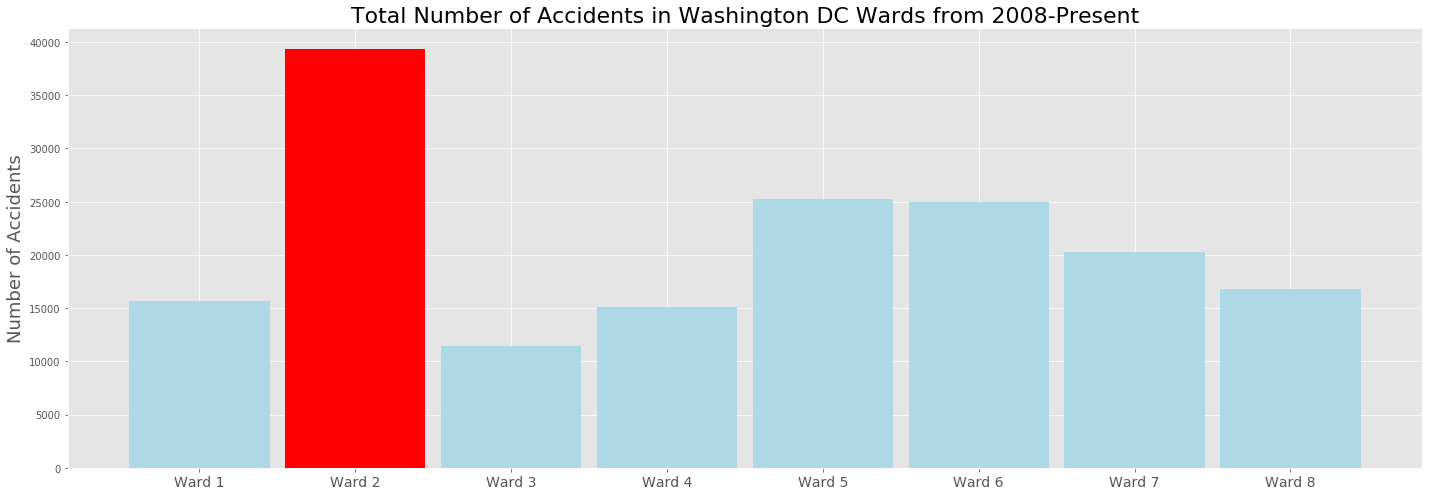

In [15]:
# BAR CHART: Total number of accidents per ward

# Create list of total ward accidents and corresponding colors
totalAccidents = [ward1_totalCount, ward2_totalCount, ward3_totalCount, ward4_totalCount, 
                  ward5_totalCount, ward6_totalCount, ward7_totalCount, ward8_totalCount]

#colors = ["lightblue", "green", "red", "blue", "gold", "grey", "purple", "pink"]
colors = ["lightblue", "red", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue"]

# Plot bar chart: Define x axis, tick mark locations, title and labels
plt.figure(figsize=(20,7))
xAxis = np.arange(len(totalAccidents))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], rotation="0", fontsize=14)
plt.bar(xAxis, totalAccidents, align="center", color=colors, width=.9)
plt.title("Total Number of Accidents in Washington DC Wards from 2008-Present", fontsize=22)
plt.ylabel("Number of Accidents", fontsize=18)
plt.tight_layout()
plt.show()

plt.savefig("DC Wards Total Accidents.png")


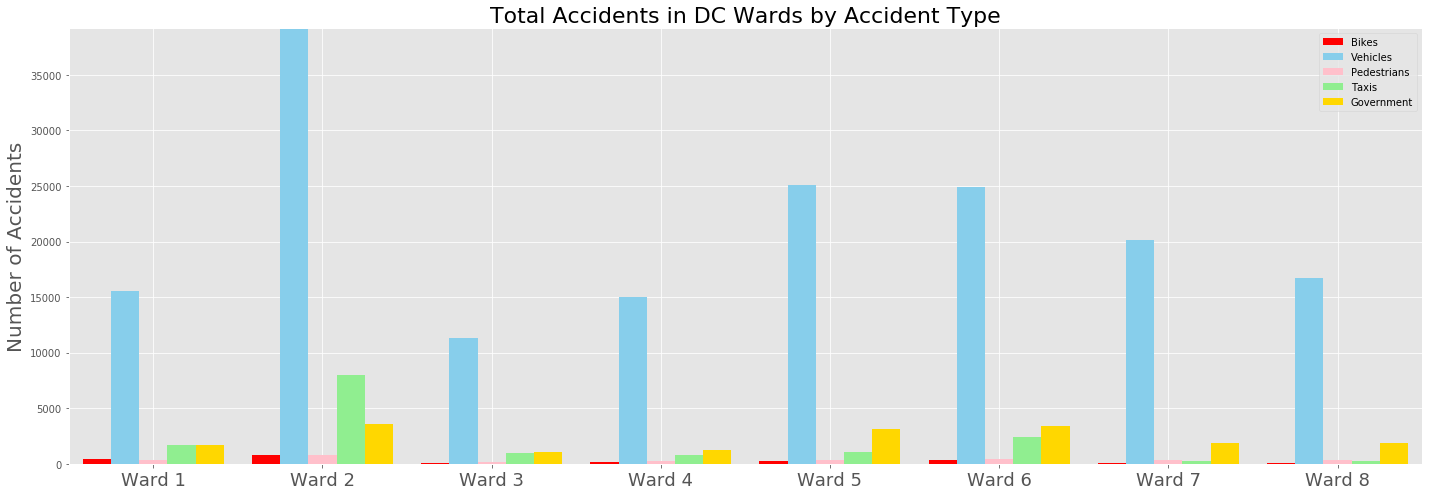

In [16]:
# BAR CHART: Total Accidents in DC Wards by Accident Type (Grouped Wards)

# Create dataframe for wards and accident types
wardCrashData = {"Location": ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], 
                 "Total Bikes": [ward1_bikeCount, ward2_bikeCount, ward3_bikeCount, ward4_bikeCount, ward5_bikeCount, ward6_bikeCount, ward7_bikeCount, ward8_bikeCount],
                 "Total Vehicles": [ward1_carCount, ward2_carCount, ward3_carCount, ward4_carCount, ward5_carCount, ward6_carCount, ward7_carCount, ward8_carCount],
                 "Total Pedestrians": [ward1_pedestrianCount, ward2_pedestrianCount, ward3_pedestrianCount, ward4_pedestrianCount, ward5_pedestrianCount, ward6_pedestrianCount, ward7_pedestrianCount, ward8_pedestrianCount],
                 "Total Taxis": [ward1_taxiCount, ward2_taxiCount, ward3_taxiCount, ward4_taxiCount, ward5_taxiCount, ward6_taxiCount, ward7_taxiCount, ward8_taxiCount],
                 "Total Government": [ward1_govCount, ward2_govCount, ward3_govCount, ward4_govCount, ward5_govCount, ward6_govCount, ward7_govCount, ward8_govCount]}

wardCrashTypeTotalDF = pd.DataFrame(wardCrashData)
#print(wardCrashTypeTotalDF)

# Setting the positions and width for the bars
xAxis = list(range(len(wardCrashTypeTotalDF["Location"])))
width = .16666667
    
# Plotting the bars
plt.figure(figsize=(20,7))

# Create a bar chart with bike data 
plt.bar([x for x in xAxis], wardCrashTypeTotalDF["Total Bikes"], width, color="red", label="Bike")
plt.bar([x + width for x in xAxis], wardCrashTypeTotalDF["Total Vehicles"], width, color="skyblue", label="Vehicles")
plt.bar([x + width*2 for x in xAxis], wardCrashTypeTotalDF["Total Pedestrians"], width,  color="pink", label="Pedestrians")
plt.bar([x + width*3 for x in xAxis], wardCrashTypeTotalDF["Total Taxis"], width,  color="lightgreen", label="Taxis")
plt.bar([x + width*4 for x in xAxis], wardCrashTypeTotalDF["Total Government"], width, color="gold", label="Government")

# Set chart title and labels
plt.title("Total Accidents in DC Wards by Accident Type", fontsize=22)
plt.ylabel("Number of Accidents", fontsize=20)

# Set the position of the x ticks
tickLocations = [x + 2 * width for x in xAxis]
plt.xticks(tickLocations, ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], rotation="0", fontsize=18)

# Setting the x-axis and y-axis limits
plt.xlim(min(xAxis)-width, max(xAxis)+width*5)
plt.ylim([0, 10 + max(wardCrashTypeTotalDF["Total Vehicles"])])

# Adding the legend and showing the plot
plt.legend(["Bikes", "Vehicles", "Pedestrians", "Taxis", "Government"], loc="upper right")
plt.tight_layout()
plt.show()

plt.savefig("Ward Accidents by Type.png")


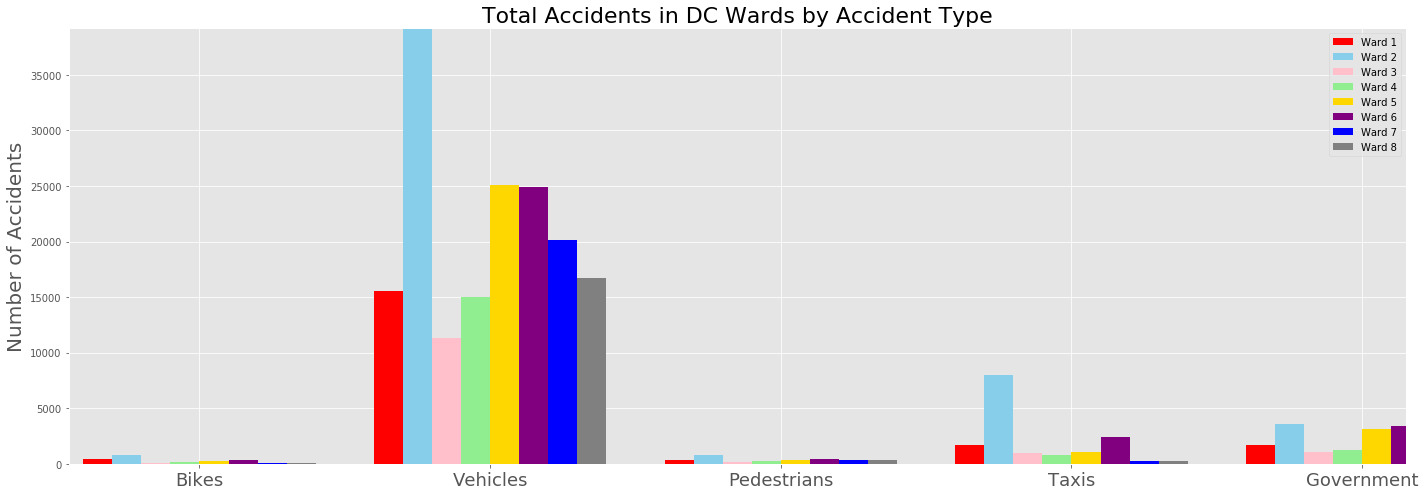

In [17]:
# BAR CHART: Total Accidents in DC Wards by Accident Type (Grouped Types)

# Create dataframe for wards and accident types
crashTypeData = {"Accident Type": ["Bikes", "Vehicles", "Pedestrians", "Taxis", "Government"],
                 "Ward 1": [ward1_bikeCount, ward1_carCount, ward1_pedestrianCount, ward1_taxiCount, ward1_govCount], 
                 "Ward 2": [ward2_bikeCount, ward2_carCount, ward2_pedestrianCount, ward2_taxiCount, ward2_govCount],
                 "Ward 3": [ward3_bikeCount, ward3_carCount, ward3_pedestrianCount, ward3_taxiCount, ward3_govCount],
                 "Ward 4": [ward4_bikeCount, ward4_carCount, ward4_pedestrianCount, ward4_taxiCount, ward4_govCount],
                 "Ward 5": [ward5_bikeCount, ward5_carCount, ward5_pedestrianCount, ward5_taxiCount, ward5_govCount],
                 "Ward 6": [ward6_bikeCount, ward6_carCount, ward6_pedestrianCount, ward6_taxiCount, ward6_govCount],
                 "Ward 7": [ward7_bikeCount, ward7_carCount, ward7_pedestrianCount, ward7_taxiCount, ward7_govCount],
                 "Ward 8": [ward8_bikeCount, ward8_carCount, ward8_pedestrianCount, ward8_taxiCount, ward8_govCount]}
                 
crashTypeDataDF = pd.DataFrame(crashTypeData)
#print(crashTypeDataDF)

# Setting the positions and width for the bars
xAxis = list(range(len(crashTypeDataDF["Accident Type"])))
width = .10


# Plotting the bars
plt.figure(figsize=(20,7))

# Create a bar chart with bike data 
plt.bar([x for x in xAxis], crashTypeDataDF["Ward 1"], width, color="red", label="Ward 1")
plt.bar([x + width for x in xAxis], crashTypeDataDF["Ward 2"], width, color="skyblue", label="Ward 2")
plt.bar([x + width*2 for x in xAxis], crashTypeDataDF["Ward 3"], width,  color="pink", label="Ward 3")
plt.bar([x + width*3 for x in xAxis], crashTypeDataDF["Ward 4"], width,  color="lightgreen", label="Ward 4")
plt.bar([x + width*4 for x in xAxis], crashTypeDataDF["Ward 5"], width, color="gold", label="Ward 5")
plt.bar([x + width*5 for x in xAxis], crashTypeDataDF["Ward 6"], width, color="purple", label="Ward 6")
plt.bar([x + width*6 for x in xAxis], crashTypeDataDF["Ward 7"], width, color="blue", label="Ward 7")
plt.bar([x + width*7 for x in xAxis], crashTypeDataDF["Ward 8"], width, color="grey", label="Ward 8")


# Set chart title and labels
plt.title("Total Accidents in DC Wards by Accident Type", fontsize=22)
plt.ylabel("Number of Accidents", fontsize=20)

# Set the position of the x ticks
tickLocations = [x + 3.5 * width for x in xAxis]
plt.xticks(tickLocations, ["Bikes", "Vehicles", "Pedestrians", "Taxis", "Government"], rotation="0", fontsize=18)

# Setting the x-axis and y-axis limits
plt.xlim(min(xAxis)-width, max(xAxis)+width*5)
plt.ylim([0, 10 + max(wardCrashTypeTotalDF["Total Vehicles"])])

# Adding the legend and showing the plot
plt.legend(["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], loc="upper right")
plt.tight_layout()
plt.show()

In [1]:
# GEOSPATIAL MAPPING: Ward Accidents by Type

# Create ward crash type dataframes with geolocation data

# WARD1 - Accident Types:
ward2_bikeDF = ward2DF.loc[ward2DF["TOTAL_BICYCLES"]>=1]
ward2_bikeGeo = ward2_bikeDF[["LATITUDE", "LONGITUDE"]]

ward2_carDF = ward2DF.loc[ward2DF["TOTAL_VEHICLES"]>=1]
ward2_carGeo = ward2_carDF[["LATITUDE", "LONGITUDE"]]

ward2_pedestrianDF = ward2DF.loc[ward2DF["TOTAL_PEDESTRIANS"]>=1]
ward2_pedestrianGeo = ward2_pedestrianDF[["LATITUDE", "LONGITUDE"]]

ward2_taxiDF = ward2DF.loc[ward2DF["TOTAL_TAXIS"]>=1]
ward2_taxiGeo = ward2_taxiDF[["LATITUDE", "LONGITUDE"]]

ward2_govDF = ward2DF.loc[ward2DF["TOTAL_GOVERNMENT"]>=1]
ward2_govGeo = ward2_govDF[["LATITUDE", "LONGITUDE"]]


# Create dataframe containing all Ward 1 geodata by accident type
ward2_CrashGeo = [ward2_bikeGeo, ward2_carGeo, ward2_pedestrianGeo, ward2_taxiGeo, ward2_govGeo]
#colors = ["red", "lightblue", "pink", "lightgreen", "gold"]

ward2_bikeLayer = gmaps.symbol_layer(ward2_bikeGeo, fill_color="red", stroke_color="red", scale=3)
ward2_carLayer = gmaps.symbol_layer(ward2_carGeo, fill_color="blue", stroke_color="blue", scale=3)
ward2_pedestrianLayer = gmaps.symbol_layer(ward2_pedestrianGeo, fill_color="yellow", stroke_color="yellow", scale=3)
ward2_taxiLayer = gmaps.symbol_layer(ward2_taxiGeo, fill_color="green", stroke_color="green", scale=3)
ward2_govLayer = gmaps.symbol_layer(ward2_govGeo, fill_color="black", stroke_color="black", scale=3)

fig = gmaps.figure()                                     

fig.add_layer(ward2_carLayer) 
fig.add_layer(ward2_bikeLayer)
fig.add_layer(ward2_pedestrianLayer)
fig.add_layer(ward2_taxiLayer)
fig.add_layer(ward2_govLayer)

fig


NameError: name 'ward2DF' is not defined

In [ ]:
# bike_df = master_df[["ADDRESS", "CRIMEID", "FATAL_BICYCLIST", "FROMDATE", "LATITUDE", "LONGITUDE", "MAJORINJURIES_BICYCLIST", "MINORINJURIES_BICYCLIST", "XCOORD", "YCOORD"]]
# bike_df.head()

In [ ]:
# geoLoc = master_df[["LATITUDE","LONGITUDE"]].astype(float)
# geoLoc.head()

In [ ]:
# # HEATMAP STREETVIEW

# weights = master_df["MINORINJURIES_BICYCLIST"]
# fig = gmaps.figure()
# fig.add_layer(gmaps.heatmap_layer(geoLoc, weights=weights))
# fig

In [ ]:
# # GEOLOCALIZED STREETMAP: Accident Markers

# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)


# # Assign the marker layer to a variable
# markers = gmaps.marker_layer(geoLoc)

# # Add the layer to the map
# fig.add_layer(markers)
# fig

In [ ]:
# # HEATMAP: Accidents in DC

# fig = gmaps.figure(map_type="SATELLITE")
# heatmap_layer = gmaps.heatmap_layer(geoLoc)
# fig.add_layer(heatmap_layer)
# fig

In [ ]:
# heatmap_layer.max_intensity = 100
# heatmap_layer.point_radius = 5